Epoch 1/10
78/78 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.6032 - val_loss: 0.6883 - val_accuracy: 0.6067
Epoch 2/10
78/78 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.6177 - val_loss: 0.6820 - val_accuracy: 0.6067
Epoch 3/10
78/78 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6177 - val_loss: 0.5864 - val_accuracy: 0.6067
Epoch 4/10
78/78 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.6823 - val_loss: 0.5434 - val_accuracy: 0.7903
Epoch 5/10
78/78 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8016 - val_loss: 0.4855 - val_accuracy: 0.7828
Epoch 6/10
78/78 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8065 - val_loss: 0.4750 - val_accuracy: 0.7865
Epoch 7/10
78/78 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8048 - val_loss: 0.4722 - val_accuracy: 0.7903
Epoch 8/10
78/78 [==

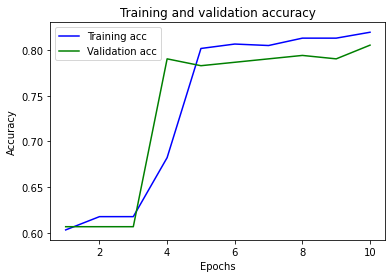

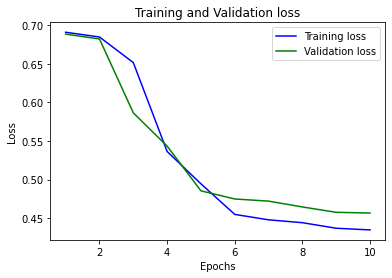

9/9 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8052


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [7]:
# -*- coding: utf-8 -*-
"""Toxicity.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1vy5bon72HBEXkc-P8g9B1YVfOD3NXhFB
"""

# Commented out IPython magic to ensure Python compatibility.
# %tensorflow_version 1.x
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("titanic.csv")

x= dataset.iloc[:,1:7].values
y= dataset.iloc[:,7].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#!pip install sklearn
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
#imputer=imputer.fit(x[:,2:8])
#x[:,2:8]=imputer.transform(x[:,2:8])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(x[:,1:7])
x[:,1:]=imputer.transform(x[:,1:7])

import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential

classifier=Sequential()

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu', input_dim=6))

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(8, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(6, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid')) 

#classifier.add(BatchNormalization())

#classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])

history = classifier.fit(x_train,y_train,validation_data=(x_test, y_test),batch_size=8,epochs=1000)

#history = classifier.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

y_pred=classifier.predict(np.array(x_test))
#y_pred=classifier.predict(x_test)
#y_pred=(y_pred>0.5)
#y_test=(y_test>0.5)

# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss')

plt.legend()
plt.show()

classifier.evaluate(x_train,y_train)

classifier.evaluate(x_test,y_test)

data=dataset.iloc[:,:].values
pd.DataFrame(data).isnull().any()
pd.DataFrame(data).isnull().sum()
#pd.DataFrame(data).notnull().any()
#pd.DataFrame(data).notnull().sum()

#print(classifier.predict(np.array([[1.05,83,8.045,8.198,78.091,.05]]))> 0.5)
